<a href="https://colab.research.google.com/github/bravoo84/Parkinson-s-Disease-Detection/blob/master/Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------Cache data found !------------
Dataframe shape:  (999999, 21)
   hold_time  latency  flight_time  Gender_Female  Gender_Male  hand_L  \
1       85.9    437.5        359.4              1            0       1   
2       78.1    210.9        125.0              1            0       1   
3       62.5    359.4        281.3              1            0       1   
4      125.0    187.5         93.8              1            0       0   
5       78.1    226.6        101.6              1            0       1   

   hand_R  hand_S  direction_LL  direction_LR  direction_LS  direction_RL  \
1       0       0             1             0             0             0   
2       0       0             1             0             0             0   
3       0       0             1             0             0             0   
4       0       1             0             0             1             0   
5       0       0             0             0             0             0   

   direction_RR  di

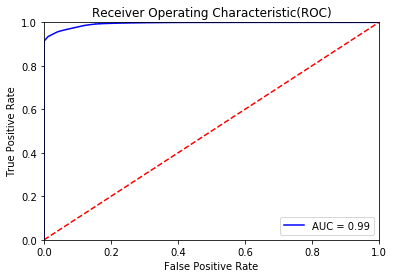

In [0]:
#---------------IMPORT FOR MODIFYING DATA-----------#
import pandas as pd 
import os
import numpy as np
from tqdm import tqdm
import re
import collections
#---------------IMPORT FOR LOGISTIC REGRESSION------#
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
#-----------------IMPORT FOR CONFUSION MATRIX---------#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#---------------IMPORT FOR DECISION TREE------------#
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
#---------------IMPORT FOR NEURAL NETS------------------------------------#
from sklearn.neural_network import MLPClassifier

def decision_tree(X,target,combined_dataframe):
  
  # dividing dataset into training and test set in 0.65:0.35 ratio
  X_train,X_test,Y_train,Y_test=train_test_split(X,target,test_size=0.35,random_state=0)
  
  # different depths of decision tree starting from 3 to 20 
  parameters={'max_depth':range(3,20)}
  
  # k-fold cross validation where k=8
  clf=GridSearchCV(tree.DecisionTreeClassifier(),parameters,n_jobs=4,cv=8)
  
  #Decision tree model
  clf.fit(X=X,y=target)
  print("Accuracy(mean CV_score): ",clf.score(X_test,Y_test)*100)
  
  #Model prediction on test set
  target_pred=clf.predict(X_test)
  
  #Confusion Matrix of decision tree
  df_confusionMatrix=pd.crosstab(Y_test,target_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)
  print("Confusion matrix:-\n",df_confusionMatrix)
  
  #best params and best score indicates optimal depth and accuracy of the model 
  print('Best CV score: ',clf.best_score_)
  print("Optimal height which lead to best score: ",clf.best_params_)
  probs=clf.predict_proba(X_test)
  
  # ROC curve
  plot_roc(Y_test,probs)
  
def neural_net_model(X,target,combined_dataframe):
	print("----------------------------------------------------------------------------------------------------")
	X_train,X_test,Y_train,Y_test=train_test_split(X,target,test_size=0.35,random_state=0)
	print("Total data for training:- ",X_train.shape[0],"\nTotal data for testing:- ",X_test.shape[0])
	#Total +ve parkinson in test dataset and train dataset
	print("Total +ve(1)/-ve(0) Parkinson case in train dataset:- \n",Y_train.value_counts(),"\nTotal +ve(1)/-ve(0) Parkinson case in test dataset:- \n",(Y_test.value_counts()))
	print("--------------Training neural net model-------------")
	#----creating a neural network--------#
	#Using stocastic gradient decent method
	#Verbose is just to see the intermediate steps
	#max_itr represent how many times does the dataset is feed to update weights 
	#for final keep it high
	nn=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(10,5),random_state=1,verbose=True, max_iter=60)
	nn.fit(X_train,Y_train)
	#Calculating the acc.
	print("predicting values....")
	target_pred=nn.predict(X_train)
	probs=nn.predict_proba(X_test)
    #probs=nn.predict_proba(X_test)
	print("Evaluating score.....")
	score_value=nn.score(X_test,Y_test)
	print("\nAccuracy:- ",score_value*100,"%")
	#df_confusionMatrix=pd.crosstab(Y_test,target_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)
	#print("Confusion matrix:-\n",df_confusionMatrix)

	print("\nEVALUATION METRIX:- \n",classification_report(Y_test,target_pred))
	print("---------------------------------------------------------------------------------------------")
	print("-------------------MODEL INFORMATION---------------------------------------------------------")
	print("List of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.")
	print(nn.coefs_)
	print("\nList of bias vectors, where the vector at index i represents the bias values added to layer i+1.")
	print(nn.intercepts_)
  #---plot for ROC-----#
	plot_roc(Y_test,probs)

def logistic_model(X,target,combined_dataframe):
	#Split the data for training purpose
	X_train,X_test,Y_train,Y_test=train_test_split(X,target,test_size=0.25,random_state=0)
	print("Total data for training:- ",X_train.shape[0],"\nTotal data for testing:- ",X_test.shape[0])
	#Total +ve parkinson in test dataset and train dataset
	print("Total +ve(1)/-ve(0) Parkinson case in train dataset:- \n",Y_train.value_counts(),"\nTotal +ve(1)/-ve(0) Parkinson case in test dataset:- \n",(Y_test.value_counts()))


	#Applying Logistic regression
	#Solver=saga is used for large dataset and when we dont have multi-class classification problem
	#Also in the documentation it is reccomended to use saga.
	print("---------Training the model-----------------")
	LogReg=LogisticRegression(solver='saga')

	#training of data
	LogReg.fit(X_train,Y_train)
	score_value=LogReg.score(X_test,Y_test)
	print("--------------------------------------LOGISTIC MODEL----------------------------------------")
	print("\nAccuracy:- ",score_value*100,"%")

	target_pred=LogReg.predict(X_test)
	probs=LogReg.predict_proba(X_test)
  #probs=LogReg.predict_proba(X_test)
	############Print confusion metrix###############
	df_confusionMatrix=pd.crosstab(Y_test,target_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)
	print("Confusion matrix:-\n",df_confusionMatrix)



	print("\nEVALUATION METRIX:- \n",classification_report(Y_test,target_pred))
	print("---------------------------------------------------------------------------------------------")
	#Comments on results :-
	#High presion is appreciated as we dont want to missclassify any patient having parkinson's disease to not having parkinson's disease
	#Hence here FP is more imp than FN 
	#Weighted avg is sum(precision1 * support1)../Total support
	#Here support is the true response that lie in that class. 
	weightVec=list(LogReg.coef_);
	for (weight,attribute) in zip(weightVec[0],list(combined_dataframe.columns)):
		print("Attribute:- ",attribute,"\t\tWeight:- ",weight)
	print("----------------------------------END OF LOGISTIC MODEL----------------------------------------") 	
	plot_roc(Y_test,probs)
#Y_test is the result for the X_test and probs= probability of getting a record classified into a 1(+ve) and 0(-ve)
# use probs=model.predict_proba(X_test)
def plot_roc(Y_test,probs):
	#--------------------------------Plotting of the ROC curve---------------------------------------------#
	# calculate the fpr and tpr for all thresholds of the classification
	preds = probs[:,1]
	fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
	roc_auc = metrics.auc(fpr, tpr)
	# method I: plt
	import matplotlib.pyplot as plt
	title_obj=plt.title('Receiver Operating Characteristic(ROC)')
	plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
	plt.legend(loc = 'lower right')
	plt.plot([0, 1], [0, 1],'r--')
	plt.xlim([0, 1])
	plt.ylim([0, 1])
	plt.ylabel('True Positive Rate')
	plt.xlabel('False Positive Rate')
	plt.show()  
  
"""
  prepare_data() takes input as two zip folder dataset from kaggle and does the following:
  
  1. It preprocess the data by removing various inconsistencies in the dataset
  2. Natural Joins the "Archived-users" dataset with "tappy data" dataset with key as user_id
  3. Saves this joined dataset as Parkinsons_data.csv
  
"""
def prepare_data():

	data_list=[]
	r=re.compile('.{10}\t.{6}\t.{2}:.{2}:.{2}..{3}\t.{1}\t.{4}..{1}\t.{2}\t.{4}..{1}\t.{4}..{1}\t\n')
	data_fail_count=0
	cwd = os.getcwd()
	trian_data_path=os.path.join(cwd,'Tappy Data')
	for file_name in tqdm(os.listdir(trian_data_path)):
		user=file_name.split('_')[0]
		f=open('Tappy Data/'+file_name)
		read_string=f.readline()
		while read_string!="":
			if r.match(read_string) is not None:
				data_list.append(read_string.split('\t')[:-1])
			else:
				data_fail_count+=1

			read_string=f.readline()
		f.close()

	print("\nBad Entries : ",data_fail_count)		

	df=pd.DataFrame(data_list)
	df.columns=['id','date','time','hand','hold_time','direction','latency','flight_time']
	df.drop(['date','time'],axis=1,inplace=True)
	no_Of_User=list(df.id.unique().shape)[0]
	print("Total no. of users: ",no_Of_User)
	print("Size of data: ",df.shape)

	#User data list

	user_data_list=[]
	user_data_fail_count=0
	user_train_data_path=os.path.join(cwd,'Archived users')
	for file_name in tqdm(os.listdir(user_train_data_path)):
		user_id=file_name.split('_')[1].split('.')[0]
		f=open('Archived users/'+file_name)
		local_data=[]
		local_data.append(user_id)
		read_string=f.readline()
		while read_string!="":
			if read_string.split(': ')[0]=="Gender":
				local_data.append(read_string.split(': ')[1].split('\n')[0])
			elif read_string.split(': ')[0]=="Parkinsons":
				local_data.append(read_string.split(': ')[1].split('\n')[0])
			elif read_string.split(': ')[0]=="Tremors":
				local_data.append(read_string.split(': ')[1].split('\n')[0])		
			read_string=f.readline()
		user_data_list.append(local_data)
		f.close()

	user_df=pd.DataFrame(user_data_list)
	user_df.columns=['id','Gender','Parkinson','Tremors']

	print("\n\t\tUSER DATA:- \n",user_df.head())

	#Merging of both the user and the tappy Data and creating a common dataframe

	combined_dataframe=pd.merge(df,user_df,on='id')
	print("\n\t\tMERGED DATA \n",combined_dataframe.head())
  
	#Converting the data type of hold time to float
	combined_dataframe['hold_time']=combined_dataframe['hold_time'].apply(lambda x:float(x))
  
	#print(type(combined_dataframe['hold_time'][0]))
	combined_dataframe['latency']=combined_dataframe['latency'].apply(lambda x:float(x))
  
	combined_dataframe['flight_time']=combined_dataframe['flight_time'].apply(lambda x:float(x))

	#ID is not ness. attribute in futher process,it was only used for joining the 2 data frames
	combined_dataframe.drop(['id'],axis=1,inplace=True)

	print("Combined Data :-\n",combined_dataframe.head())
	#Creating the gender male and female feature attributes into 2 columns.
	#We need to create two diffrent columns for this because
	#the classifier would be using the numeric values of the attributes hence they should be uniform/same in value 
	temp=pd.get_dummies(combined_dataframe['Gender'],prefix='Gender')
	combined_dataframe=pd.concat([combined_dataframe,temp],axis=1,sort=False)
	combined_dataframe.drop(['Gender'],axis=1,inplace=True)
	

	temp=pd.get_dummies(combined_dataframe['hand'],prefix='hand')
	combined_dataframe=pd.concat([combined_dataframe,temp],axis=1,sort=False)
	combined_dataframe.drop(['hand'],axis=1,inplace=True)
	

	temp=pd.get_dummies(combined_dataframe['direction'],prefix='direction')
	combined_dataframe=pd.concat([combined_dataframe,temp],axis=1,sort=False)
	combined_dataframe.drop(['direction'],axis=1,inplace=True)

	temp=pd.get_dummies(combined_dataframe['Tremors'],prefix='Tremors')
	combined_dataframe=pd.concat([combined_dataframe,temp],axis=1,sort=False)
	combined_dataframe.drop(['Tremors'],axis=1,inplace=True)

	#Classify-Attributes
	combined_dataframe=combined_dataframe.replace('True',1)
	combined_dataframe=combined_dataframe.replace('False',0)
	print("Creating a cache csv for furthur purpose.............")
	combined_dataframe.to_csv('parkinson_data.csv')
	print("Cache csv created with file name 'parkinson_data.csv'")
	print("\n\t\tCOMBINED DATAFRAME\n",combined_dataframe.head())

	#No of people having Parkinson diseases
	print("\nFrequency count of Parkinson +ve(1)/-ve(0).\n")
	print(combined_dataframe['Parkinson'].value_counts())

	

	#Create a classified attribute dataframe
	target=combined_dataframe['Parkinson']
	combined_dataframe.drop(['Parkinson'],axis=1,inplace=True)

	#Scaling the attributes values
	#Scalling is done using the mean and variance formula
	#Convert every value in the data to float for futher computation.
	X=preprocessing.scale(combined_dataframe.astype('float64'))
	return X,target,combined_dataframe

#method returns a boolean if cache file is found then true else false
def cache():
	cwd = os.getcwd()
	for file_name in os.listdir(cwd):
		if file_name=='parkinson_data.csv':
			return True;

	return False;

#getting the data from the cache csv file into the dataframes to train and test our model
def get_prepared_data():
	cwd=os.getcwd()
	data_file_path=os.path.join(cwd,'parkinson_data.csv')
	combined_dataframe=pd.read_csv(data_file_path)
	

	print(combined_dataframe.size)
	#Create a classified attribute dataframe
	target=combined_dataframe['Parkinson']
	combined_dataframe.drop(['Parkinson'],axis=1,inplace=True)
	#Convert every value in the data to float for futher computation.
	X=preprocessing.scale(combined_dataframe.astype('float64'))
	return X,target,combined_dataframe

if __name__ == '__main__':
  
  print("-----------Cache data found !------------")
  
  # drive link of already preprocessed dataset
  link="https://drive.google.com/open?id=1O3H1oCmkpZ4MReVVvHh3SosuO4uWLvgU"
  
  fluff, id = link.split('=')
  
  downloaded = drive.CreateFile({'id':id})
  downloaded.GetContentFile('Parkinsons.csv')
  
  # storing only 1 million tuples out of approx. 90 lacs tuples
  combined_dataframe=pd.read_csv('Parkinsons.csv')[1:1000000]
  print("Dataframe shape: ",combined_dataframe.shape)
  
  target=combined_dataframe['Parkinson']
  combined_dataframe.drop(['Parkinson'],axis=1,inplace=True)
  combined_dataframe.drop(combined_dataframe.columns[0], axis=1,inplace=True)
  print(combined_dataframe.head())
  
  #Convert every value in the data to float for futher computation.
  X=preprocessing.scale(combined_dataframe.astype('float64'))
  
  # Logistic Regression Accuracy:88.2475%
  #logistic_model(X,target,combined_dataframe)
  #neural_net_model(X,target,combined_dataframe)
  #Decision tree Accuracy: 99.9971%
  decision_tree(X,target,combined_dataframe)


In [0]:
# Code to read csv file into Colaboratory:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



    100% |████████████████████████████████| 993kB 20.9MB/s 


In [0]:
from google.colab import files
uploaded=files.upload()